# <center> Bài tập Thực hành môn Nhập môn Máy học </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

1. Analyze
2. Preprocess data 
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
PATH = 'credit_fraud.csv'

df = pd.read_csv(PATH)

In [3]:
df.drop(df.columns[[0,1]], axis=1, inplace= True)
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  object 
 1   CAR             25134 non-null  object 
 2   REALITY         25134 non-null  object 
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

In [5]:
df.describe()

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


## Data Analysis

In [6]:
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].nunique() > 10:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

In [7]:
categorical_cols.remove('TARGET')

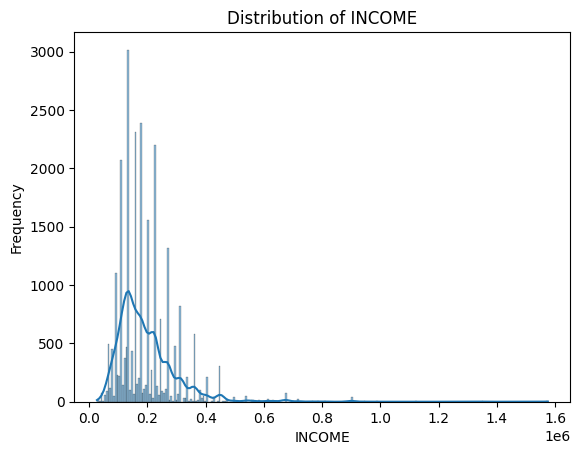

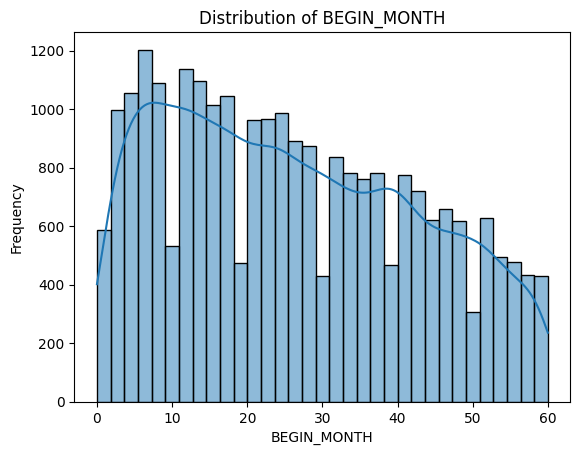

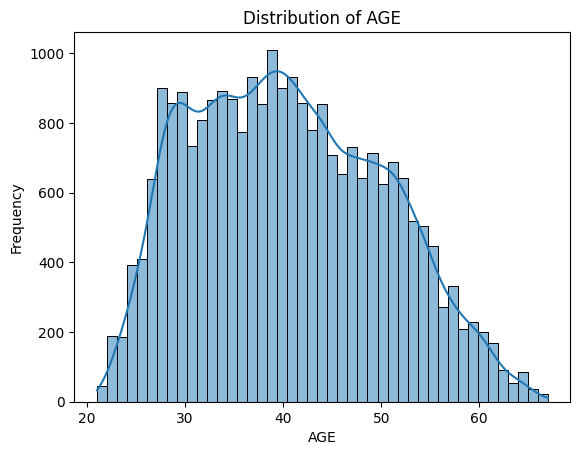

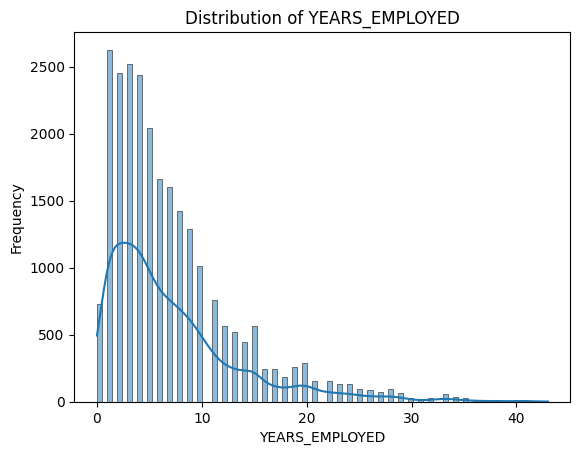

In [8]:
for col in numerical_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

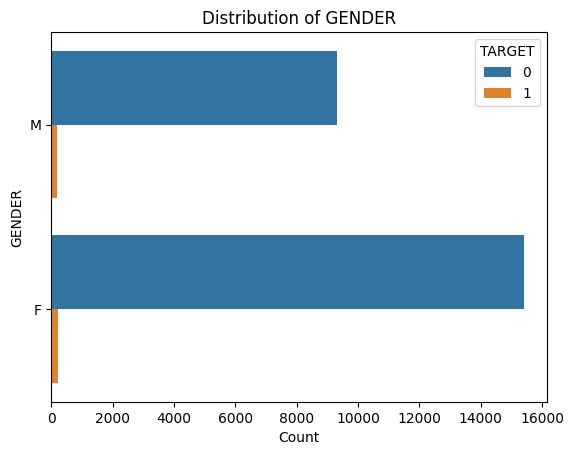

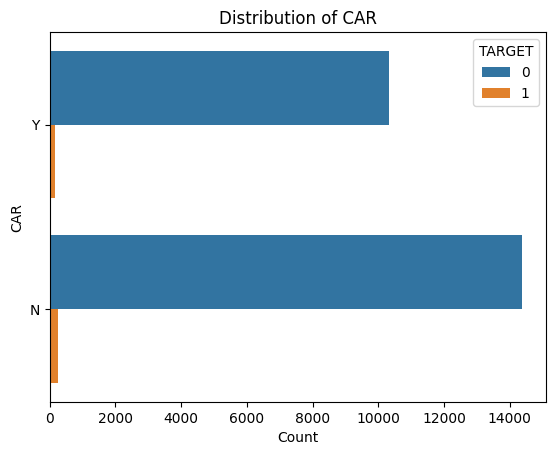

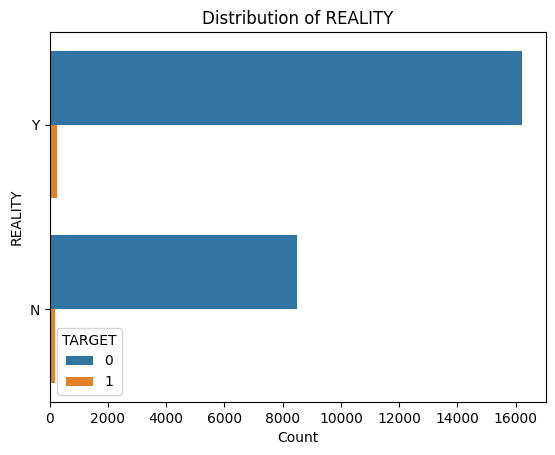

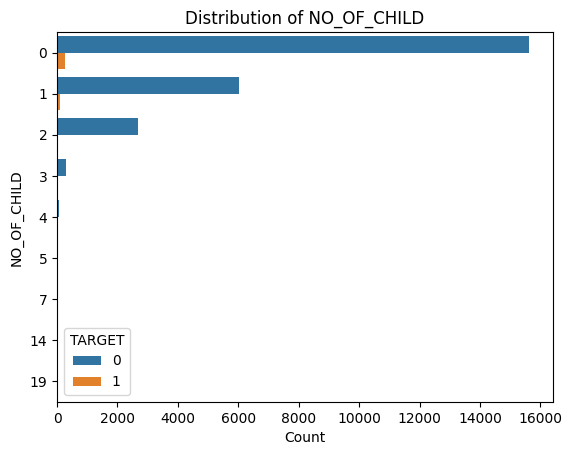

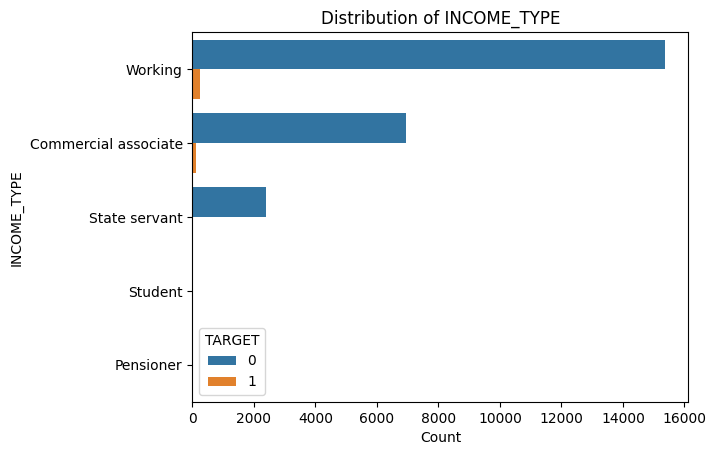

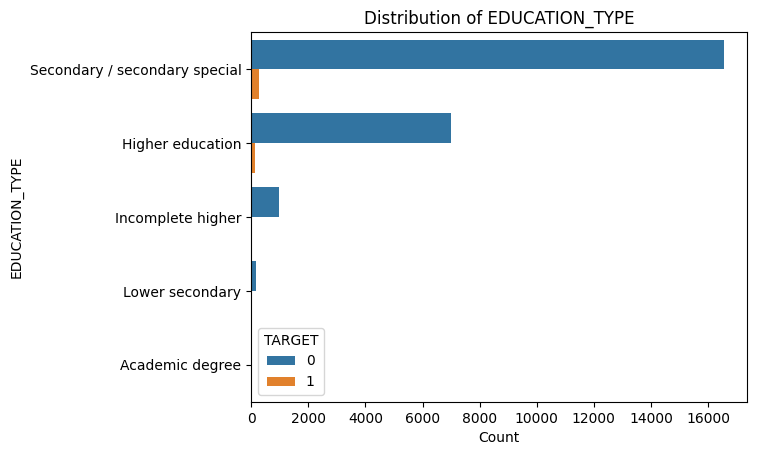

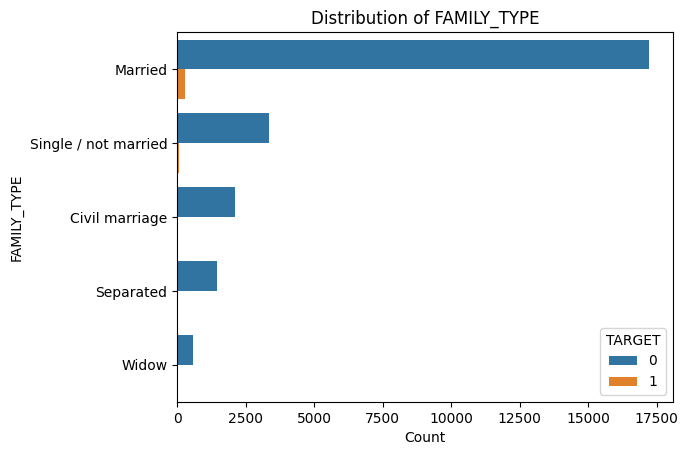

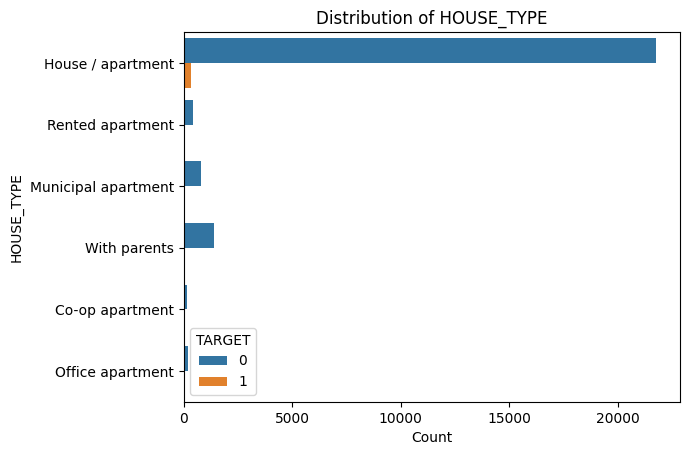

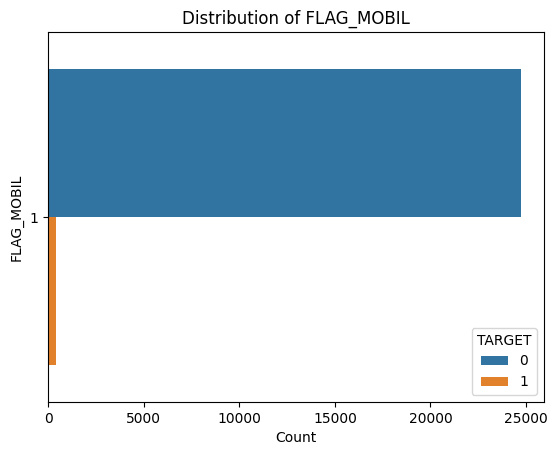

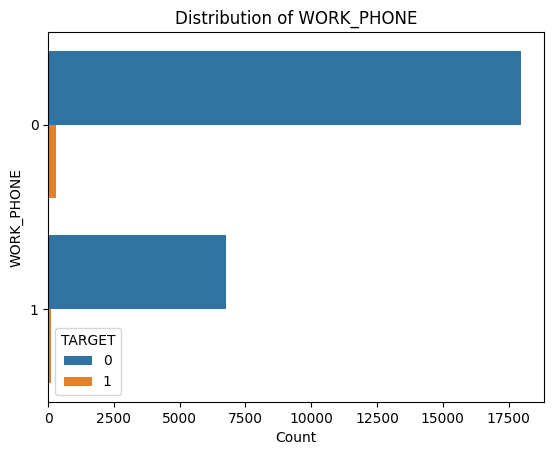

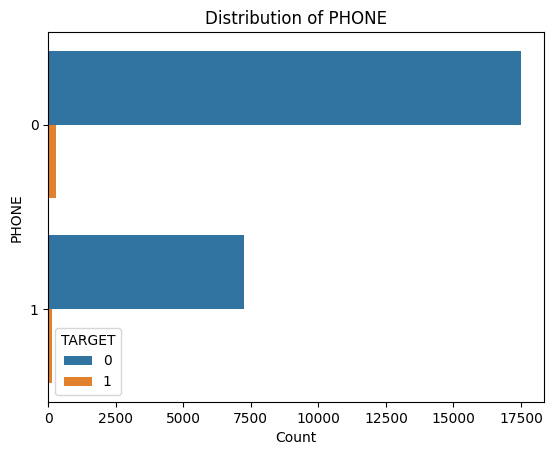

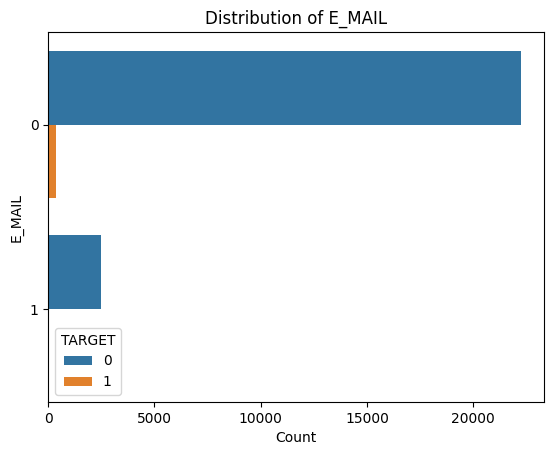

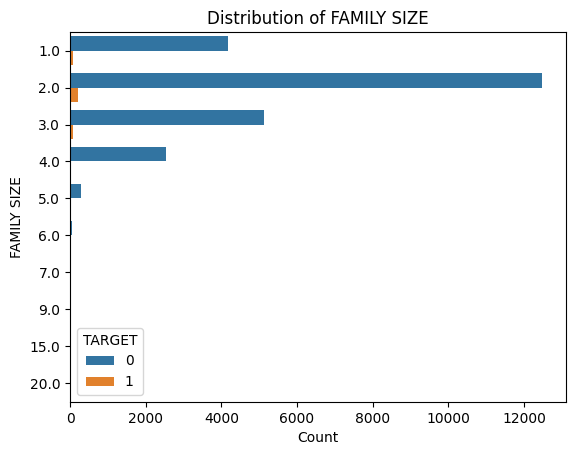

In [9]:
for col in categorical_cols:
    sns.countplot(y=col, data=df, hue='TARGET')
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.show()

## Preprocessing

In [10]:
# Check Missing values
df.isnull().sum()

GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [11]:
# Check duplicates values
df.duplicated().sum()

2938

## Feature Engineering

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
categorical_cols.remove('NO_OF_CHILD')
categorical_cols.remove('FAMILY SIZE')

In [14]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    for col in categorical_cols:
        df[col] = df[col].astype("category").cat.codes

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df.drop(['TARGET'], axis=1))
    df = pd.DataFrame(scaled_data)
    return df


In [15]:
df_feature_engineering = apply_feature_engineering(df)

In [16]:
df_feature_engineering['TARGET'] = df['TARGET']

<Axes: >

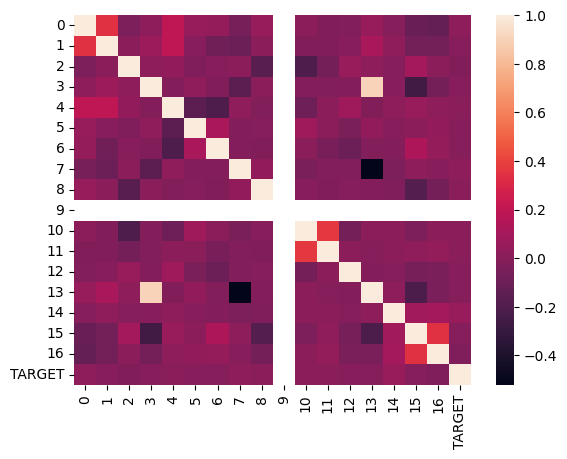

In [17]:
sns.heatmap(df_feature_engineering.corr()) # Show heatmap after normalized data

In [18]:
df_feature_engineering.drop([9], axis=1, inplace=True)
df_feature_engineering.columns = range(df_feature_engineering.shape[1])

<Axes: >

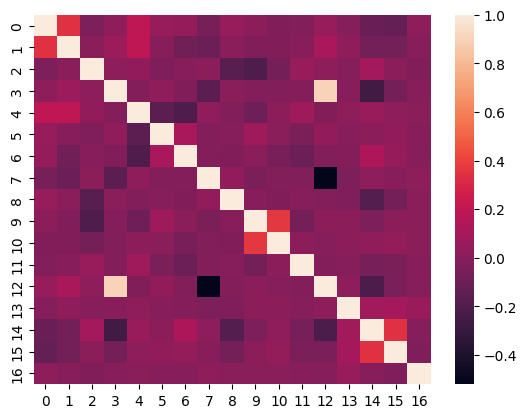

In [19]:
sns.heatmap(df_feature_engineering.corr())

In [20]:
df_feature_engineering.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.282408,1.179013,0.725866,-0.65036,-0.787817,0.743353,0.692068,-0.354533,-0.316763,-0.614048,-0.643435,-0.334555,-0.310334,0.175154,1.931508,-0.655447,0
1,-0.779783,-0.848167,0.725866,-0.65036,0.719232,-1.512352,0.692068,1.883243,-0.316763,-0.614048,1.554159,2.989045,-1.365665,-1.345590,1.199236,0.124085,0
2,-0.779783,-0.848167,0.725866,-0.65036,0.719232,-1.512352,0.692068,1.883243,-0.316763,-0.614048,1.554159,2.989045,-1.365665,-0.007336,1.199236,0.124085,0
3,-0.779783,-0.848167,0.725866,-0.65036,0.719232,-1.512352,0.692068,1.883243,-0.316763,-0.614048,1.554159,2.989045,-1.365665,-0.007336,1.199236,0.124085,0
4,-0.779783,-0.848167,0.725866,-0.65036,0.719232,-1.512352,0.692068,1.883243,-0.316763,-0.614048,1.554159,2.989045,-1.365665,0.722621,1.199236,0.124085,0


## Model Part

In [21]:
def prepare_X_y(df):

    X = df.drop(16, axis=1, inplace=False).values

    y = df[16].values
    return X, y.ravel()

X, y = prepare_X_y(df_feature_engineering)

# Apply machine learning model

## Train-test split

In [22]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2024
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def grid_search_svm(X, y):
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC())
    ])
    
    # Define the parameter grid
    param_grid = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__gamma': ['scale', 'auto']
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X, y)
    
    # Print the best parameters
    print("Best parameters for SVM: ", grid_search.best_params_)
    
    # Return the best parameters
    return grid_search.best_params_

best_svm_params = grid_search_svm(trainX, trainY)


Best parameters for SVM:  {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [24]:
from sklearn.metrics import classification_report, accuracy_score

def calculate_performance(y_true, y_pred):
    """
    Calculate and print the classification performance
    :param y_true: true labels
    :param y_pred: predicted labels
    """
    print(classification_report(y_true, y_pred))
    main_score = accuracy_score(y_true, y_pred)
    return main_score

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def build_svm_model(X, y, best_params):
    """
    Design and train the SVM model using the best params
    :param X: feature matrix
    :param y: target
    :param best_params: best parameters from grid search
    :return: trained model
    """
    # Create the SVM model with best parameters
    model = make_pipeline(
        StandardScaler(),
        SVC(C=best_params['svm__C'], kernel=best_params['svm__kernel'], gamma=best_params['svm__gamma'], random_state=42)
    )
    
    # Fit the model with X, y
    model.fit(X, y)
    
    return model

svm_model = build_svm_model(trainX, trainY, best_svm_params)
svm_pred = svm_model.predict(testX)
svm_main_score = calculate_performance(testY, svm_pred)
print(f'SVM Accuracy: {svm_main_score}')


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7417
           1       0.00      0.00      0.00       124

    accuracy                           0.98      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.97      0.98      0.98      7541

SVM Accuracy: 0.9835565574857446


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

def build_mlp_model(X, y):
    """
    Design and train the MLP model using default params
    :param X: feature matrix
    :param y: target
    :return: trained model
    """
    # Create the MLP model with default parameters
    model = make_pipeline(
        StandardScaler(),
        MLPClassifier(max_iter=300, random_state=42)
    )
    
    # Fit the model with X, y
    model.fit(X, y)
    
    return model

mlp_model = build_mlp_model(trainX, trainY)
mlp_pred = mlp_model.predict(testX)
mlp_main_score = calculate_performance(testY, mlp_pred)
print(f'MLP Accuracy: {mlp_main_score}')


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7417
           1       0.46      0.15      0.22       124

    accuracy                           0.98      7541
   macro avg       0.72      0.57      0.61      7541
weighted avg       0.98      0.98      0.98      7541

MLP Accuracy: 0.9831587322636255


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
def get_conclusion():

    conclusion = """
--Conclusion:

Both SVM and MLP models achieve high overall accuracy (98%). However, there are crucial differences in their performance, particularly for the minority class (class 1).

 SVM: While excellent at predicting the majority class (class 0), the SVM completely fails to identify any instances of the minority class (recall = 0). This is a significant drawback, especially if detecting class 1 is important.

 MLP: The MLP demonstrates a better ability to detect the minority class, though its performance is still far from ideal. It has a low recall (15%) but a reasonable precision (46%). This means that when the MLP predicts class 1, it's often correct, but it misses a lot of actual class 1 instances.

-- Other conclusions:

 Class Imbalance: The dataset likely suffers from a severe class imbalance, with class 0 dominating the samples. This can lead to models that are biased towards the majority class.
 Model Selection:  If detecting the minority class is a priority, the MLP may be a slightly better choice despite its lower overall recall. However, both models require further refinement to achieve satisfactory results for class 1.
 Next Steps: Consider techniques like oversampling the minority class, using different evaluation metrics (e.g., balanced accuracy), or trying different algorithms specifically designed for imbalanced data.

"""
    return conclusion


# Print the conclusion
print(get_conclusion())


--Conclusion:

Both SVM and MLP models achieve high overall accuracy (98%). However, there are crucial differences in their performance, particularly for the minority class (class 1).

 SVM: While excellent at predicting the majority class (class 0), the SVM completely fails to identify any instances of the minority class (recall = 0). This is a significant drawback, especially if detecting class 1 is important.

 MLP: The MLP demonstrates a better ability to detect the minority class, though its performance is still far from ideal. It has a low recall (15%) but a reasonable precision (46%). This means that when the MLP predicts class 1, it's often correct, but it misses a lot of actual class 1 instances.

-- Other conclusions:

 Class Imbalance: The dataset likely suffers from a severe class imbalance, with class 0 dominating the samples. This can lead to models that are biased towards the majority class.
 Model Selection:  If detecting the minority class is a priority, the MLP may b